In [22]:
import pandas as pd

df = pd.read_csv("clover_random_test.csv")
df.head()

,testname,git_hash,git_committer,git_committed_date,git_repo_name,version,Task Count,Thread Count,x_cells,y_cells,...,Cell Advection,Momentum Advection,Reset,Summary,Visit,Tile Halo Exchange,Self Halo Exchange,MPI Halo Exchange,Total,The Rest
0,random_test,0fdb917bf10d20363dd8b88d762851908643925b,caxwl,2021-08-09,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1369,0.3139,0.0339,0.0022,0.0,0.0001,0.2134,0.5226,1.6218,0.0003
1,random_test,1398cd9cfa7570db9c8eb7a17a2f3e698c90aeb4,GitHub,2021-08-03,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1288,0.3257,0.0311,0.0016,0.0,0.0002,0.2176,0.4954,1.5844,0.0003
2,random_test,158e23d08f73d36f71e144851451955b3ae02dff,mohan002,2021-08-03,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1369,0.3030,0.0323,0.0021,0.0,0.0002,0.2011,0.5384,1.6110,0.0003
3,random_test,2efdde26ab1eef67dfce5a29163e8d513b6dffc4,jdshanks,2020-08-20,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1439,0.2851,0.0389,0.0069,0.0,0.0003,0.1667,0.5370,1.6048,0.0003
4,random_test,89cc919b28f687a25d30b44ddf547201da930c14,jdshanks,2020-07-14,UK-MAC/CloverLeaf_ref,1.3,4,4,960,960,...,0.1242,0.3041,0.0302,0.0019,0.0,0.0001,0.2165,0.5463,1.6025,0.0003


<Axes: >

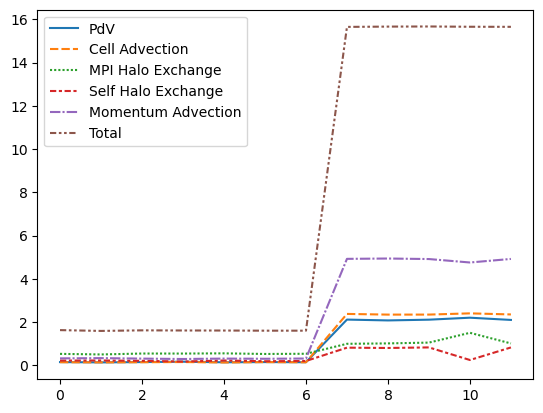

In [15]:
import seaborn as sns
# df_wide = df.pivot(index="git_hash", )
sns.lineplot(data=df[["PdV", "Cell Advection", "MPI Halo Exchange", "Self Halo Exchange", "Momentum Advection", "Total"]])

In [17]:
df[["git_hash","PdV", "Cell Advection", "MPI Halo Exchange", "Self Halo Exchange", "Momentum Advection", "Total"]]

,git_hash,PdV,Cell Advection,MPI Halo Exchange,Self Halo Exchange,Momentum Advection,Total
0,0fdb917bf10d20363dd8b88d762851908643925b,0.1419,0.1369,0.5226,0.2134,0.3139,1.6218
1,1398cd9cfa7570db9c8eb7a17a2f3e698c90aeb4,0.1285,0.1288,0.4954,0.2176,0.3257,1.5844
2,158e23d08f73d36f71e144851451955b3ae02dff,0.1425,0.1369,0.5384,0.2011,0.3030,1.6110
3,2efdde26ab1eef67dfce5a29163e8d513b6dffc4,0.1608,0.1439,0.5370,0.1667,0.2851,1.6048
4,89cc919b28f687a25d30b44ddf547201da930c14,0.1332,0.1242,0.5463,0.2165,0.3041,1.6025
5,07fcf4d773ba7626e6ea36c7002f7b2cd7c76b2a,0.1427,0.1417,0.5184,0.1820,0.2957,1.5957
6,e37e1d7aab99070a65094e784721b4d05fb86444,0.1360,0.1337,0.5274,0.1939,0.3068,1.5960
7,439c8d846ede012c89f7be451763a32dbaa5eb2c,2.1090,2.3710,0.9885,0.8092,4.9192,15.6531
8,3f889495db94c6fba5a5ec1f9937f49e8b66f94d,2.0701,2.3394,1.0069,0.7951,4.9349,15.6668
9,b5e598dc0f10ca804dce4a748e3c2314545269cd,2.1048,2.3405,1.0441,0.8212,4.9103,15.6725


In [33]:
def create_git_comapre_link(df, row1, row2):
    return "https://github.com/" + df.iloc[row1]["git_repo_name"] + "/compare/" + df.iloc[row1]["git_hash"][:7] + ".." + df.iloc[row2]["git_hash"][:7]

create_git_comapre_link(df, 6,7)

'https://github.com/UK-MAC/CloverLeaf_ref/compare/e37e1d7..439c8d8'